In [11]:
import datetime
from pprint import pprint
# test strategy
from src.algorithms.strategy import CvarMretOpt, EqualyWeighted, MeanSemidevOpt, MeanVariance,StochasticDominance
# test data fetching
from src.datasource.yahoodata import YahooDataSource
from src.backtest.backtest import BackTest


tickers = ['MSFT','MMM', 'AXP', 'AMGN', 'AAPL', 'CSCO','IBM','NVDA','TSLA','AMZN','MRK']


column_name = 'Close'
interval = '1d'

start_date = datetime.datetime(2017,1,1)
end_date = datetime.datetime(2023,1,1)

In [12]:
tickers = ['MSFT','MMM', 'AXP', 'AMGN', 'AAPL', 'CSCO','IBM','NVDA','TSLA','AMZN','MRK']

column_name = 'Close'
interval = '1d'

start_date = datetime.datetime(2013,1,1)
end_date = datetime.datetime(2023,1,1)
main_data = YahooDataSource(tickers,start_date,end_date,columns=[column_name],interval=interval)
data = main_data.get_data()
main_data.get_data_by_frequency(start_date,end_date,'1d').ffill()

Adding MSFT to the data source
Getting data for MSFT
Adding MMM to the data source
Getting data for MMM
Adding AXP to the data source
Getting data for AXP
Adding AMGN to the data source
Getting data for AMGN
Adding AAPL to the data source
Getting data for AAPL
Adding CSCO to the data source
Getting data for CSCO
Adding IBM to the data source
Getting data for IBM
Adding NVDA to the data source
Getting data for NVDA
Adding TSLA to the data source
Getting data for TSLA
Adding AMZN to the data source
Getting data for AMZN
Adding MRK to the data source
Getting data for MRK


,MSFT,MMM,AXP,AMGN,AAPL,CSCO,IBM,NVDA,TSLA,AMZN,MRK
Date,,,,,,,,,,,
2013-01-03,22.062559,53.689129,49.826691,63.645157,16.458616,14.075471,115.387848,0.293718,2.318000,12.924000,27.849964
2013-01-04,21.649643,54.086105,50.341843,63.925339,16.000160,14.096119,114.631546,0.303409,2.293333,12.957500,27.613129
2013-01-05,21.649643,54.086105,50.341843,63.925339,16.000160,14.096119,114.631546,0.303409,2.293333,12.957500,27.613129
2013-01-06,21.649643,54.086105,50.341843,63.925339,16.000160,14.096119,114.631546,0.303409,2.293333,12.957500,27.613129
2013-01-07,21.609159,54.154163,50.552963,63.602016,15.906053,13.965344,114.129257,0.294641,2.289333,13.423000,27.711813
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,234.405411,91.102127,142.827255,245.613358,130.344467,44.313667,129.377686,15.193550,123.150002,85.250000,105.924110
2022-12-27,232.667480,91.162796,142.215225,245.120117,128.535507,44.360332,130.081009,14.109439,109.099998,83.040001,106.170319
2022-12-28,230.281509,89.699272,139.903107,243.286774,124.591377,43.931007,127.888916,14.024508,112.709999,81.820000,105.185493


In [13]:
equalyWeighted = EqualyWeighted()
cvarMretOpt = CvarMretOpt(0.9,0.1)
meanSemidevOpt = MeanSemidevOpt(0.7)
meanVariance = MeanVariance(0.04,True)
StochasticDomin = StochasticDominance(equalyWeighted)


Adding ^GSPC to the data source
Getting data for ^GSPC
{'Total Return': np.float64(3.587616239588022), 'Mean Daily Return': np.float64(0.0005643115597935674), 'Std Dev of Daily Return': np.float64(0.011244045938145784), 'Sharpe Ratio': np.float64(0.7967032813914019), 'Max Drawdown': np.float64(-0.30615844335050435), 'Calmar Ratio': np.float64(11.718168541511536), 'Alpha': np.float64(0.00028279898244692607), 'Beta': np.float64(1.0754759840746566)}


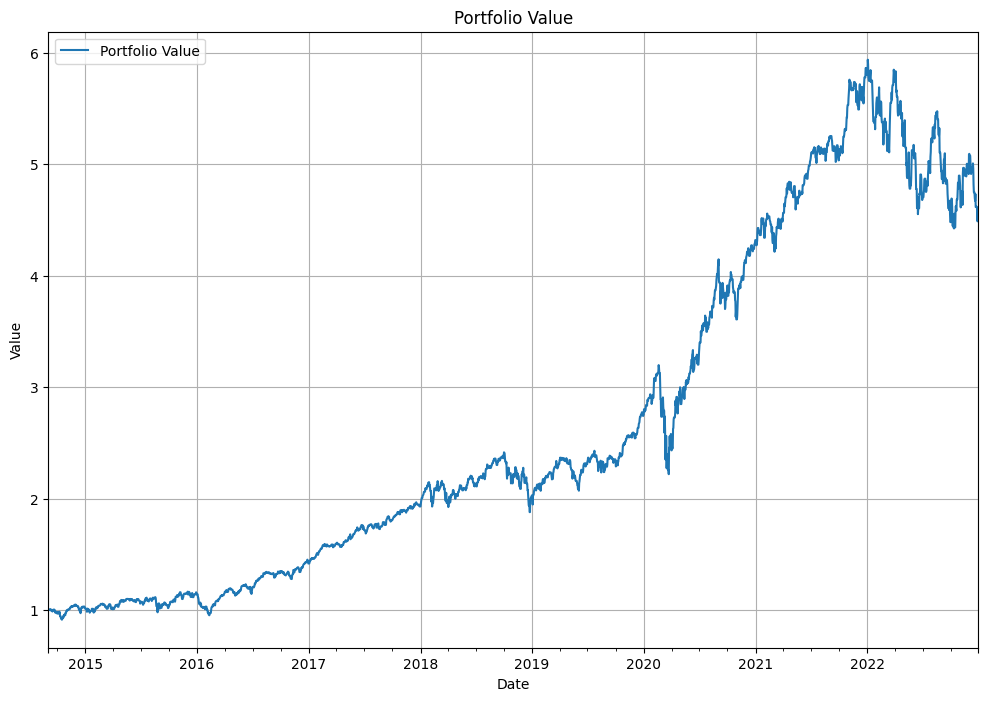

In [14]:

equalyWeighted_bt = BackTest(main_data, equalyWeighted)
equalyWeighted_bt.backtest(start_date, end_date, 20, 1, '1MS')
equalyWeighted_bt.plot_portfolio_returns()
equally_summary = equalyWeighted_bt.get_summary()
print(equally_summary)


Adding ^GSPC to the data source
Getting data for ^GSPC
{'Total Return': np.float64(2.1457689173086996), 'Mean Daily Return': np.float64(0.000439444944682149), 'Std Dev of Daily Return': np.float64(0.011171448989296675), 'Sharpe Ratio': np.float64(0.6244465008867398), 'Max Drawdown': np.float64(-0.3015091686120363), 'Calmar Ratio': np.float64(7.116761746206613), 'Alpha': np.float64(0.00019809835043346812), 'Beta': np.float64(0.9220279548400203)}


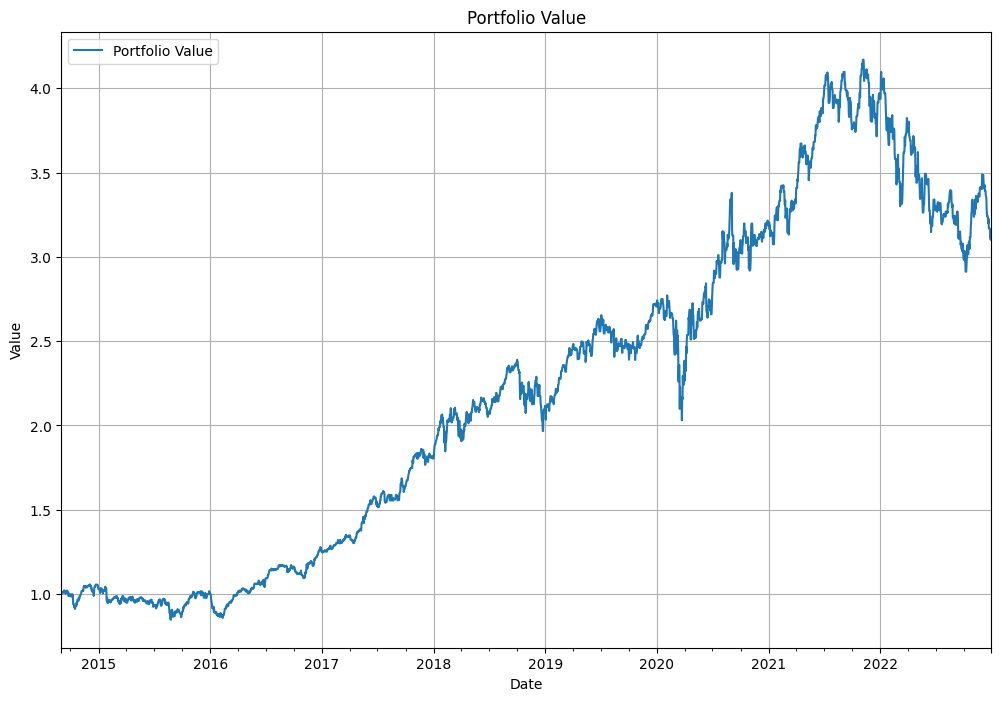

In [5]:
cvarMretOpt_bt = BackTest(main_data, cvarMretOpt)
cvarMretOpt_bt.backtest(start_date, end_date, 20, 1, '1MS')
cvarMretOpt_bt.plot_portfolio_returns()
cvar_mert_summary = cvarMretOpt_bt.get_summary()
print(cvar_mert_summary)

Adding ^GSPC to the data source
Getting data for ^GSPC
{'Total Return': np.float64(19.20131506436804), 'Mean Daily Return': np.float64(0.0012351903732662143), 'Std Dev of Daily Return': np.float64(0.022299565038717193), 'Sharpe Ratio': np.float64(0.8793014241693325), 'Max Drawdown': np.float64(-0.5564878678630996), 'Calmar Ratio': np.float64(34.50446303187281), 'Alpha': np.float64(0.0008870082929008418), 'Beta': np.float64(1.3301766800174488)}


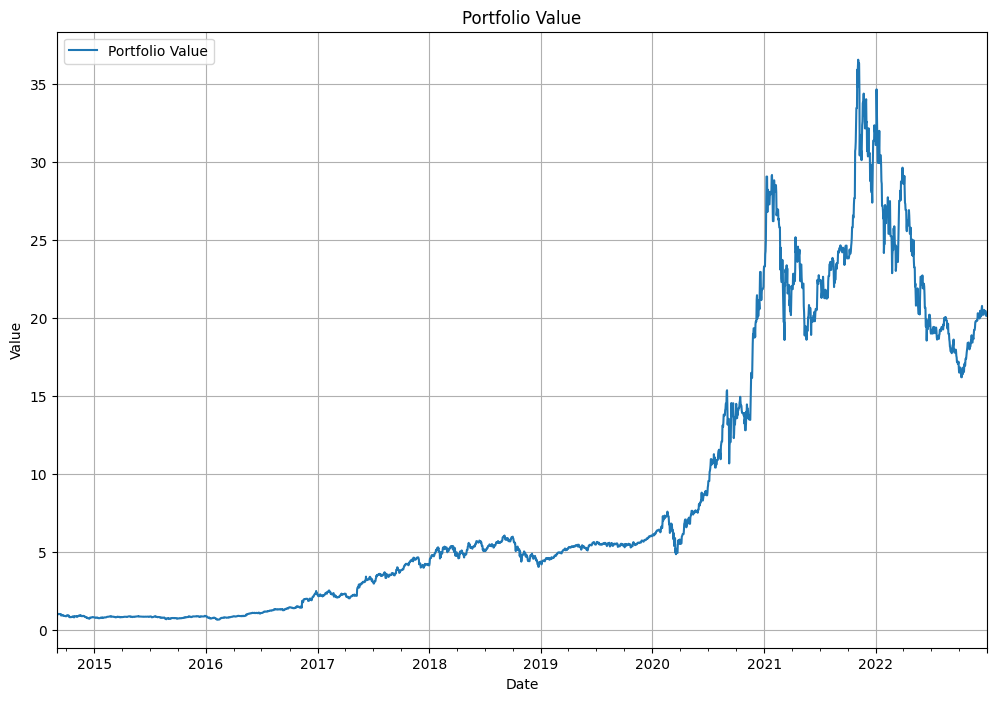

In [6]:

meanSemidevOpt_bt = BackTest(main_data, meanSemidevOpt)
meanSemidevOpt_bt.backtest(start_date, end_date, 20,1, '1MS')
meanSemidevOpt_bt.plot_portfolio_returns()
mean_semi_summary = meanSemidevOpt_bt.get_summary()
print(mean_semi_summary)

Adding ^GSPC to the data source
Getting data for ^GSPC
{'Total Return': np.float64(6.617637159411945), 'Mean Daily Return': np.float64(0.0008103103150070531), 'Std Dev of Daily Return': np.float64(0.016893778682344873), 'Sharpe Ratio': np.float64(0.7614209770154866), 'Max Drawdown': np.float64(-0.41514160585235355), 'Calmar Ratio': np.float64(15.94067437742082), 'Alpha': np.float64(0.0005860420343594653), 'Beta': np.float64(0.8567828553151977)}


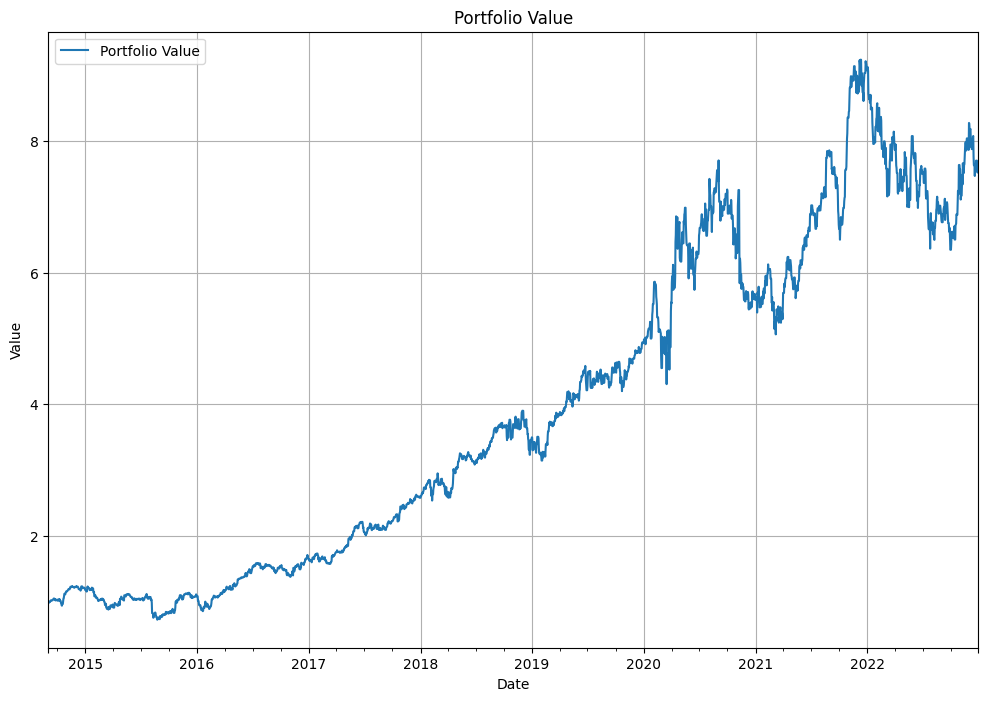

In [7]:
mean_var_bt = BackTest(main_data, meanVariance)
mean_var_bt.backtest(start_date, end_date, 20, 1, '1MS')
mean_var_bt.plot_portfolio_returns()
mean_var_summary = mean_var_bt.get_summary()
print(mean_var_summary)

Adding ^GSPC to the data source
Getting data for ^GSPC
{'Total Return': np.float64(11.041021158557266), 'Mean Daily Return': np.float64(0.0009634823399058226), 'Std Dev of Daily Return': np.float64(0.017041497533403196), 'Sharpe Ratio': np.float64(0.8975037524713403), 'Max Drawdown': np.float64(-0.4434369339169849), 'Calmar Ratio': np.float64(24.898740528961525), 'Alpha': np.float64(0.0006373540750822613), 'Beta': np.float64(1.245923432095156)}


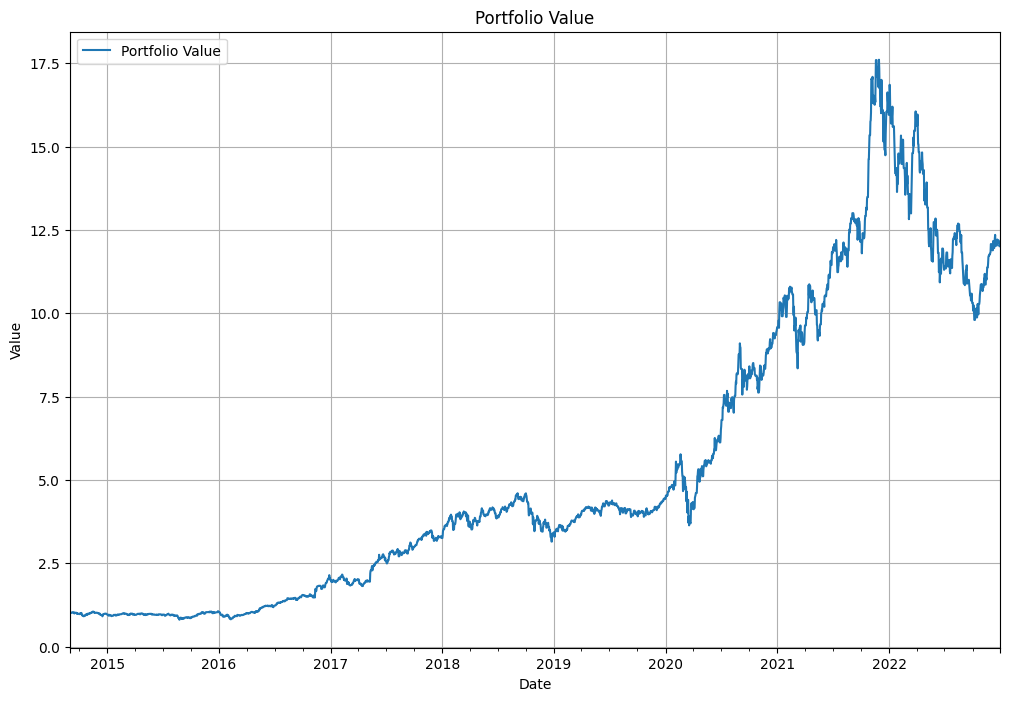

In [8]:
st_dominance = BackTest(main_data, StochasticDomin)
st_dominance.backtest(start_date, end_date, 20, 1, '1MS')
st_dominance.plot_portfolio_returns()
st_dominance_summary = st_dominance.get_summary()
print(st_dominance_summary)

In [9]:
from matplotlib import pyplot as plt

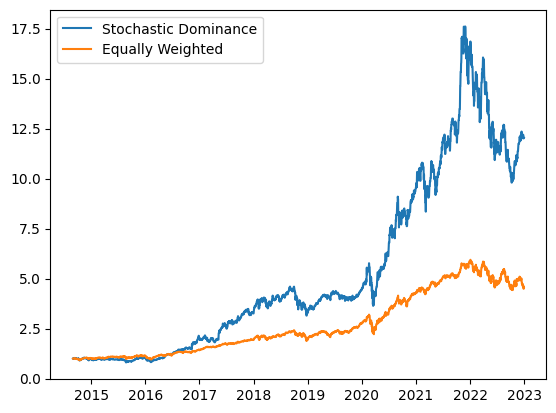

In [10]:
plt.plot(st_dominance.portfolio_value,label='Stochastic Dominance')
plt.plot(equalyWeighted_bt.portfolio_value,label='Equally Weighted')
plt.legend()
plt.show()